In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, r2_score
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math
import numpy

In [2]:
path_train = 'D:/data_coffee.csv'
path_test = 'D:data_coffee_test.csv'

In [3]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [4]:
data_train.head()
data_test.head()

,Date,Temperature,Gas_Price,Oil_Price,Coffee_price
0,1/6/2024,30.0,21750,19740.0,123450
1,2/6/2024,30.5,21750,19740.0,119950
2,3/6/2024,30.5,21750,19740.0,119950
3,4/6/2024,30.0,21750,19740.0,119950
4,5/6/2024,31.0,21750,19740.0,122950


In [5]:
data_train.describe()
data_test.describe()

,Temperature,Gas_Price,Oil_Price,Coffee_price
count,15.000000,15.000000,15.000000,15.000000
mean,30.566667,21377.333333,19570.666667,122646.666667
std,0.593617,280.598001,150.402634,1990.734490
min,29.500000,21140.000000,19420.000000,119950.000000
25%,30.250000,21140.000000,19420.000000,121150.000000
50%,30.500000,21310.000000,19640.000000,122950.000000
75%,31.000000,21750.000000,19740.000000,123950.000000
max,32.000000,21750.000000,19740.000000,126200.000000


In [6]:
data_train.dtypes

Date             object
Temperature     float64
Gas_Price         int64
Oil_Price         int64
Coffee_price      int64
dtype: object

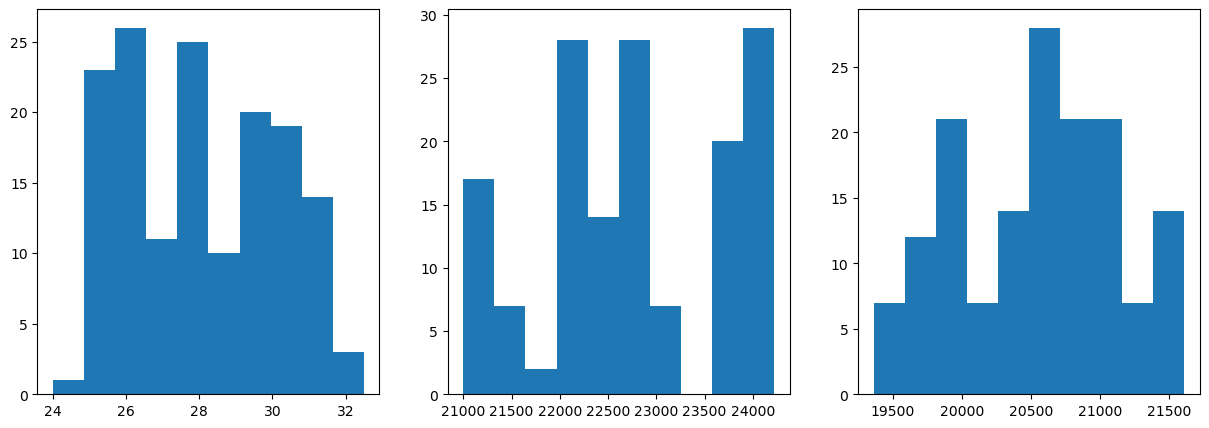

In [7]:
config, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
ax1.hist(data_train['Temperature'])
ax2.hist(data_train['Gas_Price'])
ax3.hist(data_train['Oil_Price'])
plt.show()

In [8]:
data_train.info
data_test.info

<bound method DataFrame.info of          Date  Temperature  Gas_Price  Oil_Price  Coffee_price
0    1/6/2024         30.0      21750    19740.0        123450
1    2/6/2024         30.5      21750    19740.0        119950
2    3/6/2024         30.5      21750    19740.0        119950
3    4/6/2024         30.0      21750    19740.0        119950
4    5/6/2024         31.0      21750    19740.0        122950
5    6/6/2024         31.0      21140    19420.0        124450
6    7/6/2024         30.5      21140    19420.0        126200
7    8/6/2024         30.5      21140    19420.0        125350
8    9/6/2024         29.5      21140    19420.0        123350
9   10/6/2024         30.0      21140    19420.0        123950
10  11/6/2024         30.5      21140    19420.0        123950
11  12/6/2024         30.5      21140    19420.0        122350
12  13/6/2024         32.0      21310    19640.0        120950
13  14/6/2024         31.0      21310    19640.0        121350
14  15/6/2024         3

In [9]:
data_train.isnull().sum()
data_test.isnull().sum()

Date            0
Temperature     0
Gas_Price       0
Oil_Price       0
Coffee_price    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x253faa0da50>,
 'caps': [<matplotlib.lines.Line2D at 0x253faa08c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x253fa545490>],
 'medians': [<matplotlib.lines.Line2D at 0x253faa9fd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x253faa0fbd0>],
 'means': []}

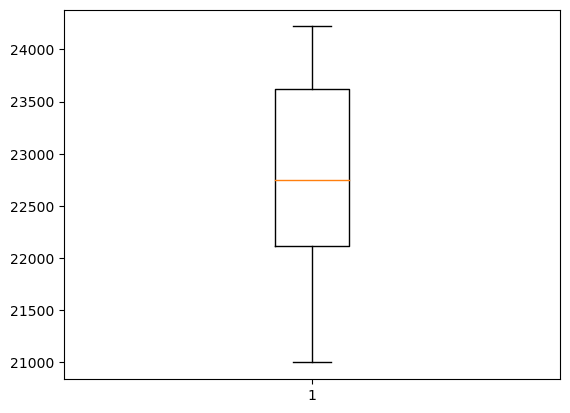

In [10]:
plt.boxplot(data_train['Gas_Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253fa7073d0>,
 'caps': [<matplotlib.lines.Line2D at 0x253fa71cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x253fa706710>],
 'medians': [<matplotlib.lines.Line2D at 0x253fa71e210>],
 'fliers': [<matplotlib.lines.Line2D at 0x253fa71ec10>],
 'means': []}

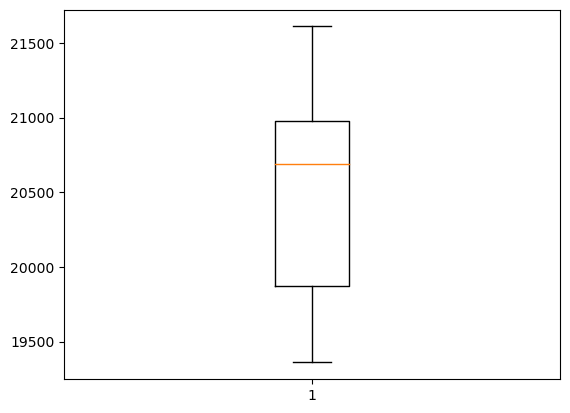

In [11]:
plt.boxplot(data_train['Oil_Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253fa7763d0>,
 'caps': [<matplotlib.lines.Line2D at 0x253fa777c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x253fa775690>],
 'medians': [<matplotlib.lines.Line2D at 0x253fa781210>],
 'fliers': [<matplotlib.lines.Line2D at 0x253fa781cd0>],
 'means': []}

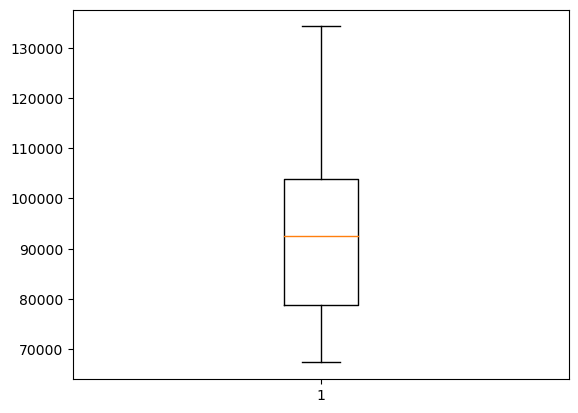

In [12]:
plt.boxplot(data_train['Coffee_price'])

In [13]:
#Data is not imbalance and Data hasn't noise

In [14]:
data_train.pop('Date')
date_predict = data_test.pop('Date')

<Axes: >

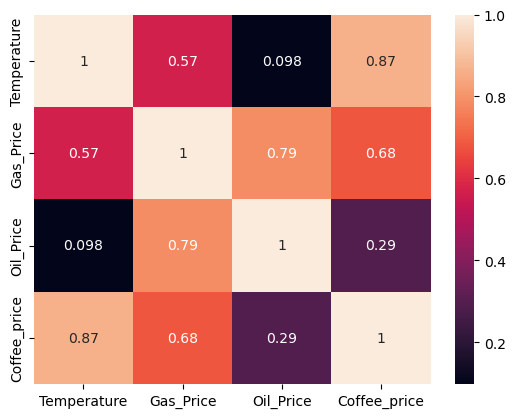

In [15]:
sns.heatmap(data_train.corr(), annot=True)

In [16]:
#After seeing heat map, Oil_Price don't impact to Coffee_price so we will delete this attribute

In [17]:
# data_train = data_train.drop(['Oil_Price'], axis = 1)
# data_test = data_test.drop(['Oil_Price'], axis = 1)

Text(0, 0.5, 'Coffee_price (VND/kg)')

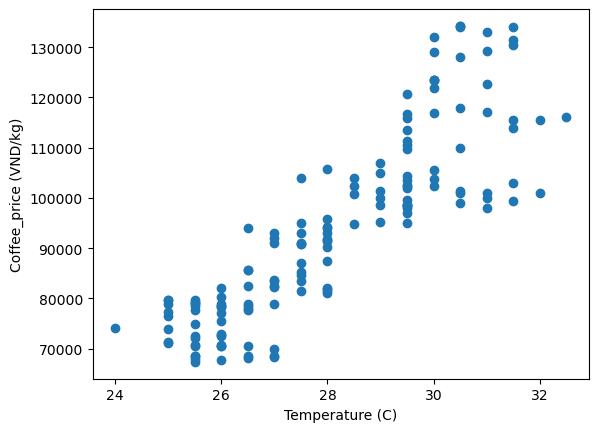

In [18]:
#scatter for temperator and coffee price
plt.scatter(data_train['Temperature'], data_train['Coffee_price'])
plt.xlabel('Temperature (C)')
plt.ylabel('Coffee_price (VND/kg)')

In [19]:
#See this scatter, when temperature up, coffee_price will up. The cost of coffee_price is highest when temperature is about 30 to 32 'C

In [20]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]


In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
rf = RandomForestRegressor(random_state=42)
svr = SVR(kernel = 'linear')

param_grid_rf = {
    'n_estimators': [20, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10, 100, 1000, 1200, 1500, 2000, 4000, 5000, 10000],
    'epsilon': [0.001, 0.01, 0.1, 1],
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv = 15, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random forest found: ", best_params_rf)


grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv= 15, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, y_train)
best_params_svr = grid_search_svr.best_params_
print("Best parameters for SVR found: ", best_params_svr)

Best parameters for Random forest found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Best parameters for SVR found:  {'C': 10000, 'epsilon': 0.001}


In [23]:
svr = SVR(**best_params_svr)
rf = RandomForestRegressor(**best_params_rf)
svr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [24]:
#See to 2 map with random forest regressor MSE and SVR MSE (MSE = mean squared error), SVR isn't better than Random Forest.
#So we test data after cross validating with kfold = 15. Data test include records about 1/6/2024 to 15/6/2024

Metrics		RF		SVR
RMSE		4147.6325		17747.2802
MAE		3497.5556		16743.8886
MAPE		2.8265		13.6010
R2_Score		-3.6509		-84.1530


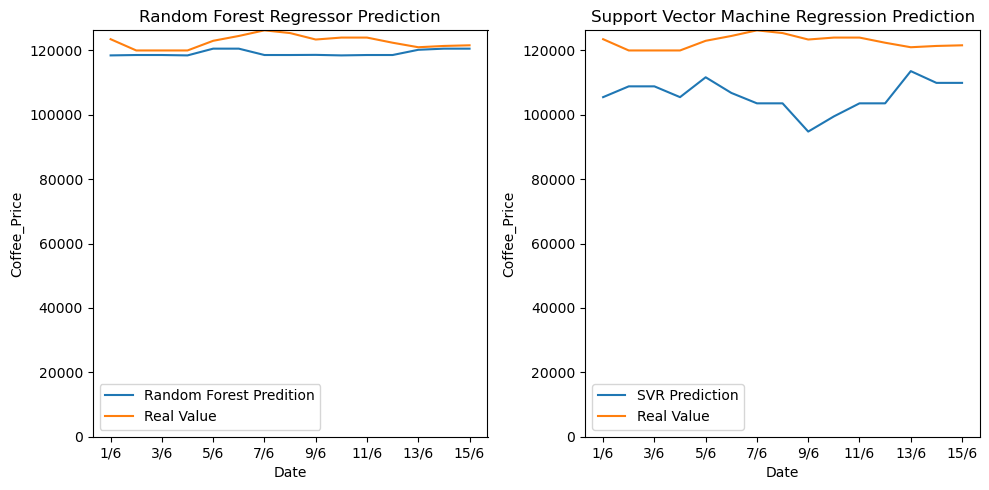

In [25]:
RF_prediction = rf.predict(X_test)
SVR_prediction = svr.predict(X_test)
RF_rmse = math.sqrt(mean_squared_error(y_test, RF_prediction))
SVR_rmse = math.sqrt(mean_squared_error(y_test, SVR_prediction))

RF_mae = np.mean(np.abs(y_test - RF_prediction))
SVR_mae = np.mean(np.abs(y_test - SVR_prediction))

RF_mape = np.mean(np.abs((y_test - RF_prediction)/y_test)) * 100
SVR_mape = np.mean(np.abs((y_test - SVR_prediction)/y_test)) * 100

RF_r2score = r2_score(y_test, RF_prediction)
SVR_r2score = r2_score(y_test, SVR_prediction)

mt = {
    'RMSE' : [RF_rmse, SVR_rmse],
    'MAE' : [RF_mae, SVR_mae],
    'MAPE' : [RF_mape, SVR_mape],
    'R2_Score' : [RF_r2score, SVR_r2score]
}
print('Metrics\t\tRF\t\tSVR')
for metric in mt:
    print(f"{metric}\t\t{mt[metric][0]:.4f}\t\t{mt[metric][1]:.4f}")
    
    
date = ['1/6', '3/6', '5/6', '7/6', '9/6', '11/6', '13/6', '15/6']
plt.figure(figsize=(10, 5))
num_xticks = 15

xticks_indices = np.linspace(0, num_xticks-1, len(date), dtype=int)
xticks_labels = date

plt.subplot(1, 2, 1)
plt.plot(RF_prediction, label='Random Forest Predition')
plt.plot(y_test, label = 'Real Value')
plt.xticks(xticks_indices, xticks_labels)
plt.ylim(0, max(max(y_test), max(RF_prediction)) )
plt.xlabel('Date')
plt.ylabel('Coffee_Price')
plt.title('Random Forest Regressor Prediction')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(SVR_prediction, label='SVR Prediction')
plt.plot(y_test, label = 'Real Value')
plt.xticks(xticks_indices, xticks_labels)
plt.ylim(0, max(max(y_test), max(SVR_prediction)))
plt.xlabel('Date')
plt.ylabel('Coffee_Price')
plt.title('Support Vector Machine Regression Prediction')
plt.legend()

plt.tight_layout()
plt.show()